In [2]:
import pandas as pd
import numpy as np
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from gensim.models import KeyedVectors

nlp = spacy.load('en')
#keyedv= KeyedVectors.load_word2vec_format('../dataset/wiki.en.vec')

dtypes ={
    'id': np.uint32,
    'qid1': np.uint32,
    'qid2': np.uint32,
    'question1': np.str,
    'question2': np.str,
    'is_duplicate': np.uint8
}

df = pd.read_csv('../dataset/quora_train.csv', dtype=dtypes)

In [4]:
def compare(q1, q2):
    q1 = q1 if type(q1) is str else ''
    q2 = q2 if type(q2) is str else ''
    
    qt1 = [t for t in nlp(q1) if t.tag_.startswith('N')]# or t.tag_.startswith('V') or t.tag_.startswith('J')]
    qt2 = [t for t in nlp(q2) if t.tag_.startswith('N')]# or t.tag_.startswith('V') or t.tag_.startswith('J')]
    
    count = 0
    s_sum = 0
    for t1 in qt1:
        for t2 in qt2:
            if t1.tag_[0] == t2.tag_[0]:
                s_sum += t1.similarity(t2)
                count += 1                  
    
    return s_sum / count if count != 0 else 0

In [5]:
from multiprocessing import Pool
pool = Pool(4)

df['compare'] = pool.starmap(compare, tuple(zip(df.question1, df.question2)))

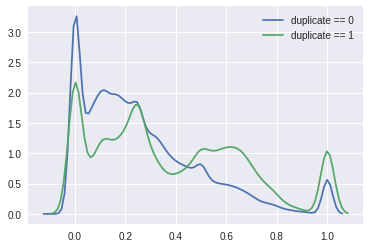

In [10]:
sns.kdeplot(df[df.is_duplicate==0].compare, label="duplicate == 0")
sns.kdeplot(df[df.is_duplicate==1].compare, label="duplicate == 1")

In [20]:
def compare2(q1, q2):
    q1 = q1 if type(q1) is str else ''
    q2 = q2 if type(q2) is str else ''
    
    qt1 = [t for t in nlp(q1) if t.tag_.startswith('N') or t.tag_.startswith('V') or t.tag_.startswith('J')]
    qt2 = [t for t in nlp(q2) if t.tag_.startswith('N') or t.tag_.startswith('V') or t.tag_.startswith('J')]
    
    count = 0
    s_sum = 0
    for t1 in qt1:
        for t2 in qt2:
            if t1.tag_[0] == t2.tag_[0]:
                s_sum += t1.similarity(t2)
                count += 1                  
    
    return s_sum / count if count != 0 else 0

from multiprocessing import Pool
pool = Pool(4)

df['compare2'] = pool.starmap(compare2, tuple(zip(df.question1, df.question2)))

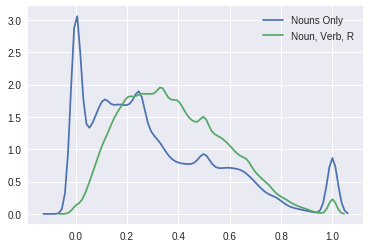

In [21]:
sns.kdeplot(df.compare, label="Nouns Only")
sns.kdeplot(df.compare2, label="Noun, Verb, R")

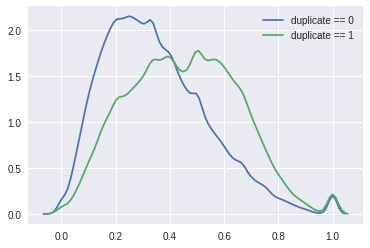

In [22]:
sns.kdeplot(df[df.is_duplicate==0].compare2, label="duplicate == 0")
sns.kdeplot(df[df.is_duplicate==1].compare2, label="duplicate == 1")

In [34]:
df[['question1', 'question2', 'is_duplicate']][100:110].values

array([[ 'Will there really be any war between India and Pakistan over the Uri attack? What will be its effects?',
        'Will there be a nuclear war between India and Pakistan?', 1],
       ['Did Ronald Reagan have a mannerism in his speech?',
        'How did Ronald Reagan react to 9/11?', 0],
       [ 'What were the war strategies of the Union and the Confederates during the Civil War?',
        'How could the Confederates have possibly defeated Union forces at Gettysburg during the American Civil War?',
        0],
       ['Which is the best fiction novel of 2016?',
        'Which are some of the best fiction novels?', 0],
       ['Can I recover my email if I forgot the password?',
        'What should I do if I forgot my email password?', 1],
       ['Will the recent demonetisation results in higher GDP? If so how much?',
        'How demonetisation could affect the GDP of India in both short run and long run?',
        0],
       ['Have you ever heard of travel hacking?',
     